In [11]:
import pandas as pd

In [12]:
apple = pd.read_csv("../TrainingData/HistoricalData_Apple.csv", parse_dates = ['Date'], index_col = 'Date')
apple.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2023-11-09,$182.41,53763540,$182.96,$184.12,$181.81
2023-11-08,$182.89,49340280,$182.35,$183.45,$181.59
2023-11-07,$181.82,70529970,$179.18,$182.44,$178.97
2023-11-06,$179.23,63841310,$176.38,$179.43,$176.21
2023-11-03,$176.65,79829250,$174.24,$176.82,$173.35


In [13]:
apple.rename(columns = {"Close/Last": "Close"}, inplace = True)
apple[["Close", "Open", "High", "Low"]] = apple[["Close", "Open", "High", "Low"]].map(lambda value: value.replace("$", ""))
apple.head(3)

,Close,Volume,Open,High,Low
Date,,,,,
2023-11-09,182.41,53763540,182.96,184.12,181.81
2023-11-08,182.89,49340280,182.35,183.45,181.59
2023-11-07,181.82,70529970,179.18,182.44,178.97


In [14]:
to_int_columns = ["Close", "Open", "High", "Low"]
apple[to_int_columns] = apple[to_int_columns].astype({col: "float64" for col in to_int_columns})
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2023-11-09 to 2013-11-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2517 non-null   float64
 1   Volume  2517 non-null   int64  
 2   Open    2517 non-null   float64
 3   High    2517 non-null   float64
 4   Low     2517 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 118.0 KB


In [15]:
apple.sort_index(inplace = True)
apple


,Close,Volume,Open,High,Low
Date,,,,,
2013-11-11,18.5374,226990197,18.5711,18.6311,18.3718
2013-11-12,18.5718,204271118,18.4882,18.7114,18.4643
2013-11-13,18.5941,196615949,18.5000,18.6518,18.4629
2013-11-14,18.8629,281606247,18.6718,18.9029,18.6382
2013-11-15,18.7497,317359713,18.8064,18.8961,18.7318
...,...,...,...,...,...
2023-11-03,176.6500,79829250,174.2400,176.8200,173.3500
2023-11-06,179.2300,63841310,176.3800,179.4300,176.2100
2023-11-07,181.8200,70529970,179.1800,182.4400,178.9700


In [16]:
apple.loc["2017-04"]

,Close,Volume,Open,High,Low
Date,,,,,
2017-04-03,35.9250,79880160,35.9275,36.0300,35.7625
2017-04-04,36.1925,79461200,35.8125,36.2225,35.7925
2017-04-05,36.0050,110598000,36.0550,36.3650,35.9525
2017-04-06,35.9150,84524160,36.0725,36.1300,35.8625
2017-04-07,35.8350,66634640,35.9325,36.0450,35.8175
2017-04-10,35.7925,75618720,35.9000,35.9698,35.7250
2017-04-11,35.4075,121366080,35.7350,35.8375,35.0150
2017-04-12,35.4500,81281680,35.4000,35.5375,35.2525
2017-04-13,35.2625,71102040,35.4775,35.5950,35.2625


In [17]:
apple.loc["2018", "High"].max()

58.3675

In [21]:
apple.resample("YS").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-01-01,19.509,305952086.343,19.500,19.651,19.376
2014-01-01,23.066,251682095.532,23.055,23.253,22.871
2015-01-01,30.010,206585050.476,30.042,30.310,29.716
2016-01-01,26.151,153070699.048,26.127,26.357,25.923
2017-01-01,37.638,108010805.896,37.613,37.852,37.372
2018-01-01,47.263,135073534.502,47.276,47.749,46.796
2019-01-01,52.064,112242893.016,51.967,52.458,51.568
2020-01-01,95.347,157621403.123,95.268,96.662,93.913
2021-01-01,140.989,90540527.143,140.861,142.348,139.474


In [23]:
pd.set_option("display.float_format", '{:.3f}'.format)

apple.resample("Y").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.509,305952086.343,19.500,19.651,19.376
2014-12-31,23.066,251682095.532,23.055,23.253,22.871
2015-12-31,30.010,206585050.476,30.042,30.310,29.716
2016-12-31,26.151,153070699.048,26.127,26.357,25.923
2017-12-31,37.638,108010805.896,37.613,37.852,37.372
2018-12-31,47.263,135073534.502,47.276,47.749,46.796
2019-12-31,52.064,112242893.016,51.967,52.458,51.568
2020-12-31,95.347,157621403.123,95.268,96.662,93.913
2021-12-31,140.989,90540527.143,140.861,142.348,139.474


In [25]:
pd.set_eng_float_format(accuracy = 2, use_eng_prefix = True)
apple.resample("Y").mean()

,Close,Volume,Open,High,Low
Date,,,,,
2013-12-31,19.51,305.95M,19.50,19.65,19.38
2014-12-31,23.07,251.68M,23.05,23.25,22.87
2015-12-31,30.01,206.59M,30.04,30.31,29.72
2016-12-31,26.15,153.07M,26.13,26.36,25.92
2017-12-31,37.64,108.01M,37.61,37.85,37.37
2018-12-31,47.26,135.07M,47.28,47.75,46.80
2019-12-31,52.06,112.24M,51.97,52.46,51.57
2020-12-31,95.35,157.62M,95.27,96.66,93.91
2021-12-31,140.99,90.54M,140.86,142.35,139.47


<Axes: xlabel='Date', ylabel='Open'>

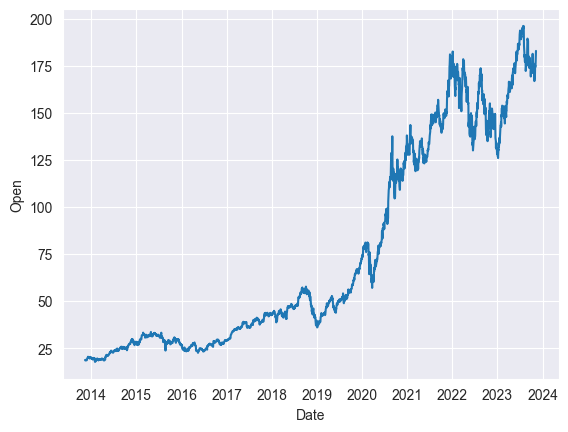

In [27]:
import seaborn as sns
sns.set_style('darkgrid')
sns.lineplot(data=apple, x= apple.index, y = "Open")

(array([18536., 18540., 18544., 18548., 18552., 18556., 18560., 18564.]),
 [Text(18536.0, 0, '2020-10-01'),
  Text(18540.0, 0, '2020-10-05'),
  Text(18544.0, 0, '2020-10-09'),
  Text(18548.0, 0, '2020-10-13'),
  Text(18552.0, 0, '2020-10-17'),
  Text(18556.0, 0, '2020-10-21'),
  Text(18560.0, 0, '2020-10-25'),
  Text(18564.0, 0, '2020-10-29')])

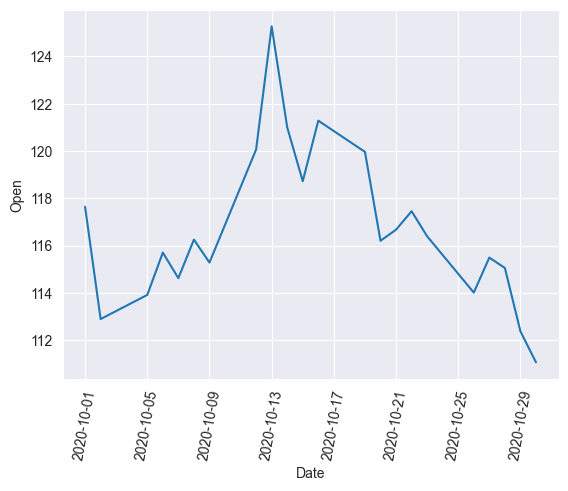

In [34]:
import matplotlib.pyplot as plt
data = apple.loc["2020-10"]
sns.lineplot(data=data, x= data.index, y = "Open")
plt.xticks(rotation = 80)


<Axes: xlabel='Date', ylabel='Open'>

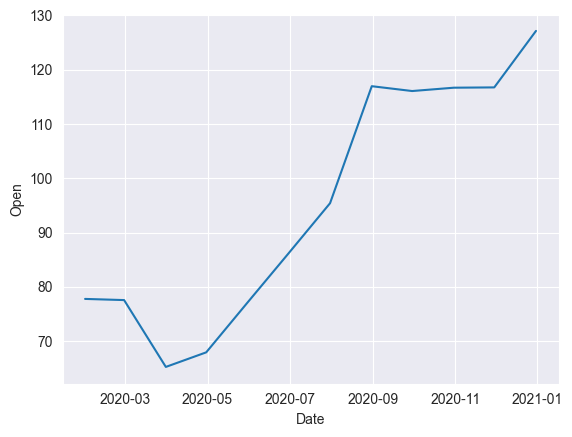

In [33]:
data = apple.loc["2020"].resample("M").mean()
sns.lineplot(data=data, x= data.index, y = "Open")